Only reading in one email for now

In [1]:
enroncsv = "../experiments/data/enron.csv"
metadataHeaders = '../experiments/data/metadataHeaders.csv'

In [ ]:
import pandas as pd

columns = pd.read_csv(metadataHeaders, sep=',').columns.tolist()
columns

In [32]:
df = pd.read_csv(enroncsv, names=columns, sep='|', low_memory=False)

print("-- DONE --")
df

-- DONE --


,Filename,Person,Directory,Message-ID,Date,From,To,Subject,Cc,Time,...,Content-Type,Content-Transfer-Encoding,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName
0,.DS_Store,maildir,maildir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1076.,guzman-m,notes_inbox,<24986559.1075840719297.JavaMail.evans@thyme>,"Thu, 22 Feb 2001 13:39:00 -0800",pete.davis@enron.com,pete.davis@enron.com,Start Date: 2/22/01; HourAhead hour: 22; <COD...,"bert.meyers@enron.com, bill.williams.iii@enron...",NaN,...,"text/plain; charset=""us-ascii""",7bit,"bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",NaN,\mark guzman 6-28-02\Notes Folders\Notes inbox,GUZMAN-M,mark guzman 6-28-02.nsf
2,1126.,guzman-m,notes_inbox,<7461681.1075840720553.JavaMail.evans@thyme>,"Tue, 06 Feb 2001 06:33:00 -0800",virginia.thompson@enron.com,"monika.causholli@enron.com, mark.guzman@enron.com",DMS 6572 PPLMON 1-23-01,bill.iii@enron.com,NaN,...,"text/plain; charset=""us-ascii""",7bit,bill.iii@enron.com,Virginia Thompson,"Monika Causholli, Mark Guzman",Bill Williams III,NaN,\mark guzman 6-28-02\Notes Folders\Notes inbox,GUZMAN-M,mark guzman 6-28-02.nsf
3,934.,guzman-m,notes_inbox,<28617320.1075840715596.JavaMail.evans@thyme>,"Sat, 03 Mar 2001 05:37:00 -0800",pete.davis@enron.com,pete.davis@enron.com,Start Date: 3/3/01; HourAhead hour: 14; <CODE...,"bert.meyers@enron.com, bill.williams.iii@enron...",NaN,...,"text/plain; charset=""us-ascii""",7bit,"bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",NaN,\mark guzman 6-28-02\Notes Folders\Notes inbox,GUZMAN-M,mark guzman 6-28-02.nsf
4,1657.,guzman-m,notes_inbox,<27141378.1075840735658.JavaMail.evans@thyme>,"Fri, 27 Oct 2000 03:26:00 -0700",carla.hoffman@enron.com,"tim.belden@enron.com, robert.badeer@enron.com,...","DJ House Votes, But FERC Unswayed On Calif Pwr...",NaN,NaN,...,"text/plain; charset=""us-ascii""",7bit,NaN,Carla Hoffman,"Tim Belden, Robert Badeer, Jeff Richter, Phill...",NaN,NaN,\mark guzman 6-28-02\Notes Folders\Notes inbox,GUZMAN-M,mark guzman 6-28-02.nsf
5,1121.,guzman-m,notes_inbox,<9976025.1075840720405.JavaMail.evans@thyme>,"Wed, 07 Feb 2001 16:29:00 -0800",enron.announcements@enron.com,ena.employees@enron.com,XMS (Expense Management System),NaN,NaN,...,"text/plain; charset=""ANSI_X3.4-1968""",quoted-printable,NaN,Enron Announcements,ENA Employees,NaN,NaN,\mark guzman 6-28-02\Notes Folders\Notes inbox,GUZMAN-M,mark guzman 6-28-02.nsf
6,1395.,guzman-m,notes_inbox,<16074642.1075840728320.JavaMail.evans@thyme>,"Mon, 11 Dec 2000 17:23:00 -0800",special-offers-help@mail.southwest.com,mark.guzman@enron.com,"Click 'n Save Internet Specials December 12, 2000",NaN,NaN,...,"text/plain; charset=""us-ascii""",7bit,NaN,Southwest Airlines <special-offers-help@mail.s...,<mark.guzman@enron.com>,NaN,NaN,\mark guzman 6-28-02\Notes Folders\Notes inbox,GUZMAN-M,mark guzman 6-28-02.nsf
7,449.,guzman-m,notes_inbox,<29426092.1075840701169.JavaMail.evans@thyme>,"Sun, 15 Apr 2001 02:41:00 -0700",pete.davis@enron.com,pete.davis@enron.com,Start Date: 4/15/01; HourAhead hour: 10; <COD...,"bert.meyers@enron.com, bill.williams.iii@enron...",NaN,...,"text/plain; charset=""us-ascii""",7bit,"bert.meyers@enron.com, bill.williams.iii@enron...",Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",NaN,\mark guzman 6-28-02\Notes Folders\Notes inbox,GUZMAN-M,mark guzman 6-28-02.nsf
8,1490.,guzman-m,notes_inbox,<7012900.1075840731125.JavaMail.evans@thyme>,"Mon, 27 Nov 2000 09:16:00 -0800",jesse.bryson@enron.com,portland.shift@enron.com,EPE Model,NaN,NaN,...,"text/plain; charset=""us-ascii""",7bit,NaN,Jesse Bryson,Portland Shift,NaN,NaN,\mark guzman 6-28-02\Notes Folders\Notes inbox,GUZMAN-M,mark guzman 6-28-02.nsf
9,765.,guzman-m,notes_inbox

Lets query for a mail that does not have `Message-ID` with `.JavaMail.evans@thyme`

In [4]:
result = df[pd.notnull(df['Message-ID'])]

result = result.loc[~result['Message-ID'].str.contains('.JavaMail.evans@thyme')]
result

,Filename,Person,Directory,Message-ID,Date,From,To,Subject,Cc,Time,...,Content-Type,Content-Transfer-Encoding,Bcc,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName


In [5]:
result = df[pd.notnull(df['Subject'])]

result = result.loc[result['Subject'].str.contains('Porn')]
len(result)

25

No results so the server `.JavaMail.evans@thyme` is not helpfull

Lets count the number of non null fields per header and make it a percentage over the total number of parsable emials

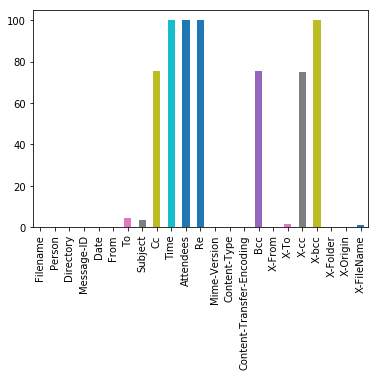

Filename                      0.000000
Person                        0.000000
Directory                     0.000000
Message-ID                    0.000387
Date                          0.000387
From                          0.000387
To                            4.222880
Subject                       3.713189
Cc                           75.279489
Time                         99.999807
Attendees                    99.994201
Re                           99.998840
Mime-Version                  0.011597
Content-Type                  0.011597
Content-Transfer-Encoding     0.010631
Bcc                          75.284322
X-From                        0.011404
X-To                          1.770680
X-cc                         75.084079
X-bcc                        99.959410
X-Folder                      0.012370
X-Origin                      0.006958
X-FileName                    0.820493
dtype: float64

In [19]:
import matplotlib.pyplot as plt

numberOfRows = len(df.index)
missingData = (numberOfRows - df.count()) / numberOfRows * 100
plot = missingData.plot(kind='bar')

plt.show()
missingData

How many people flolders don't match their X-origin

In [7]:
len(df.loc[df['Person'] != df['X-Origin'].str.lower()])

35496

How many different `Content-Type`'s are in the dataset

In [8]:
df['Content-Type'].unique()

array([nan, 'text/plain; charset="us-ascii"',
       'text/plain; charset="ANSI_X3.4-1968"'], dtype=object)

How many different `Content-Transfer-Encoding`'s are in the dataset

In [9]:
df['Content-Transfer-Encoding'].unique()

array([nan, '7bit', 'quoted-printable', 'base64',
       '\\JSKILLIN (Non-Privileged)\\Deleted Items', '\\jskillin\\Inbox',
       '\\HARORA (Non-Privileged)\\Arora, Harry\\Deleted Items',
       '\\HARORA (Non-Privileged)\\Arora, Harry\\Inbox',
       'EID: <24606> ERe: <0>'], dtype=object)

How many different `Mime-Version`'s are in the dataset

In [10]:
df['Mime-Version'].unique()

array([nan,  1.])

Lets gage the the stogasticity

Filename                      15000
Person                          238
Directory                      1765
From                          20327
To                            58554
Subject                      159257
Cc                            29598
Time                              2
Attendees                        17
Re                                5
Mime-Version                      2
Content-Type                      3
Content-Transfer-Encoding         9
Bcc                           29594
X-From                        27789
X-To                          73435
X-cc                          33675
X-bcc                           140
X-Folder                       5355
X-Origin                        289
X-FileName                      436
dtype: int64

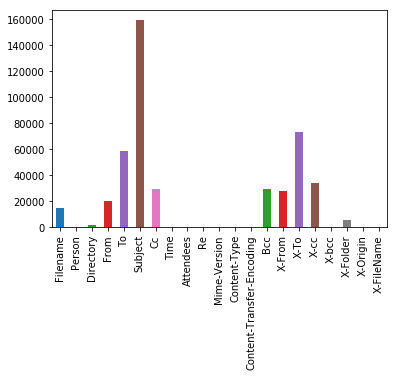

In [31]:
df = df.drop(['Message-ID', 'Date'], axis=1)

headers = df.columns.values.tolist()
uniqueness = []

for header in headers:
    uniqueness.append(len(df[header].unique()))
    
uniqueness = pd.Series(uniqueness, index=headers)

plot = uniqueness.plot(kind='bar')
uniqueness

The graph above indicates that the subject contains he most information of all of the email headers and is the most unique.